# Feature Importance and Feature Selection With XGBoost

## 0. Introduction

This notebook contains:
  1. Plot feature importances with XGBoost
  2. Use feature importance to perform feature selection

## 1. Feature importance with XGBoost

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost.plotting import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
pima = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

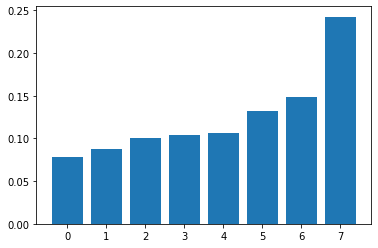

In [6]:
data = pd.read_csv(pima, header=None)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
model = XGBClassifier()
model.fit(X, y)
feature_imp = np.sort(model.feature_importances_)
plt.bar(range(0, len(feature_imp)), feature_imp)
plt.show()

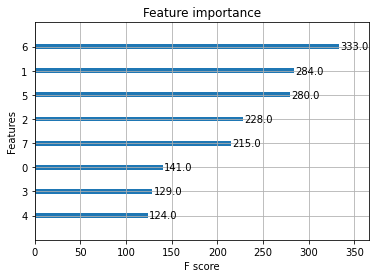

In [4]:

# Using in-built function
plot_importance(model)
plt.show()

## 2. Feature selection using XGBoost feature importance scores

In [12]:
data = pd.read_csv(pima, header=None)
X, y = data.iloc[:, :-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(f"Accuracy: {score*100:.2f}%")

Accuracy: 68.83%


In [15]:
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
  # select features
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  y_preds = selection_model.predict(select_X_test)
  score = accuracy_score(y_test, y_preds)
  print(f"Features: {select_X_train.shape[1]}, Threshold: {thresh:.2f}, Accuracy: {score*100:.2f}%")

Features: 8, Threshold: 0.07, Accuracy: 68.83%
Features: 7, Threshold: 0.09, Accuracy: 70.78%
Features: 6, Threshold: 0.09, Accuracy: 69.48%
Features: 5, Threshold: 0.10, Accuracy: 71.43%
Features: 4, Threshold: 0.12, Accuracy: 75.32%
Features: 3, Threshold: 0.14, Accuracy: 70.78%
Features: 2, Threshold: 0.14, Accuracy: 75.32%
Features: 1, Threshold: 0.25, Accuracy: 68.83%
